In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path
import functools

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-05-14 10:09:05.785343: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 10:09:05.856537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 10:09:05.858320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 10:09:07.536437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc, plotting

In [6]:
from daaf import estimator_metrics

In [7]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1715263005/1715264399/metrics/*.parquet")

In [8]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/8 [00:00<?, ?it/s]

2024-05-14 10:09:13,412	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

Read progress 0:   0%|          | 0/50 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [9]:
df_metrics.head()

,episode,exp_id,meta,state_values,over_states_then_runs,over_runs_then_states,policy_metrics,method
0,210,1715263005-21b6c410-ABCSeq,"{'algorithm': 'one-step-td', 'algorithm_args':...","{'data': [-41.609358307470586, -37.00250686714...","{'mae': [3.6644516926540907, 2.351490232435727...","{'mae': [4.4294263545227945, 3.438744492927786...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",PP/LEAST
1,210,1715263005-2269c7b3-IceWorld,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-21.019047619047637, -20.59375, -19....","{'mae': [10.468658191546094, 9.132634140204011...","{'mae': [16.80332580376269, 15.66794538578296,...","{'pi_equi': [0.6875, 0.5625, 0.6875, 0.5, 0.68...",PP/IMR
2,210,1715263005-208748ef-RedGreenSeq,"{'algorithm': 'nstep-td', 'algorithm_args': '{...","{'data': [-22.28312328281366, -20.166418959093...","{'mae': [0.77100046456405, 1.4820405605185907,...","{'mae': [0.9849470982792375, 0.912362697127023...","{'pi_equi': [1.0, 0.8888888888888888, 1.0, 1.0...",PP/IMR
3,210,1715263005-2368b584-ABCSeq,"{'algorithm': 'first-visit-mc', 'algorithm_arg...","{'data': [-48.242857142857154, -41.52554744525...","{'mae': [1.458278610499502, 1.0107928221020148...","{'mae': [2.0285713621980745, 2.113673134313573...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT
4,210,1715263005-20552ca0-IceWorld,"{'algorithm': 'one-step-td', 'algorithm_args':...","{'data': [-3.444038492170421, -2.2090094957192...","{'mae': [19.44051234362073, 18.779293130803538...","{'mae': [30.230695941514107, 30.42420960482479...","{'pi_equi': [0.5, 0.625, 0.625, 0.625, 0.6875]}",PP/IMR


In [10]:
df_metrics.iloc[0]

episode                                                                210
exp_id                                          1715263005-21b6c410-ABCSeq
meta                     {'algorithm': 'one-step-td', 'algorithm_args':...
state_values             {'data': [-41.609358307470586, -37.00250686714...
over_states_then_runs    {'mae': [3.6644516926540907, 2.351490232435727...
over_runs_then_states    {'mae': [4.4294263545227945, 3.438744492927786...
policy_metrics                      {'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}
method                                                            PP/LEAST
Name: 0, dtype: object

In [11]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'one-step-td',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-48.99999993, -41.99999999, -35.        , -28.        ,
        -21.        , -14.        ,  -7.        ,   0.        ]),
 'env': {'args': '{"length": 7, "distance_penalty": false}',
  'level': 'n=7',
  'name': 'ABCSeq',
  '_level': '7'},
 'epsilon': 0.0,
 'exp_id': '1715263005-21b6c410-ABCSeq',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 4,
 'run_id': 4,
 'traj_mapping_method': 'LEAST'}

In [12]:
envs = dataproc.get_distinct_envs(df_metrics)

In [13]:
envs

{('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}'}

In [14]:
sorted(envs)

[('ABCSeq', 'n=10'),
 ('ABCSeq', 'n=7'),
 ('FrozenLake-v1', '4x4'),
 ('GridWorld', '4x12'),
 ('IceWorld', '4x4'),
 ('IceWorld', '8x8'),
 ('RedGreenSeq', 'n=9'),
 ('TowerOfHanoi', 'disks=4')]

In [15]:
df_eval_result = dataproc.create_eval_result_data(df_metrics)

In [16]:
df_eval_result["one-step"]

,episode,exp_id,state_values,over_states_then_runs,over_runs_then_states,policy_metrics,method,algorithm,algorithm_args,reward_period,discount_factor,drop_truncated_feedback_episodes,level,name
9,210,1715263005-3572da47-IceWorld,"{'data': [-37.542857142857144, -34.80519480519...","{'mae': [1.7068935563036947, 1.870842415675237...","{'mae': [0.3480937321811098, 0.621529757137899...","{'pi_equi': [0.875, 0.8125, 0.875, 0.875, 0.93...",OP/OT,first-visit-mc,{},2,1.00,False,4x4,IceWorld
16,210,1715263005-2fd11454-IceWorld,"{'data': [-157.5238095238096, -155.29661016949...","{'mae': [28.008063581874012, 21.46164475450442...","{'mae': [1.358621179663544, 2.3612964336500113...","{'pi_equi': [0.609375, 0.65625, 0.75, 0.640625...",OP/OT,first-visit-mc,{},2,1.00,False,8x8,IceWorld
24,210,1715263005-7a6dc6ab-ABCSeq,"{'data': [-43.28150973467099, -37.545222135674...","{'mae': [1.8851276536600627, 2.007692738311484...","{'mae': [5.205016366314962, 3.842254745151729,...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT,first-visit-mc,{},2,0.99,False,n=7,ABCSeq
57,210,1715263005-631e781d-ABCSeq,"{'data': [-77.6994919965922, -71.5224989928174...","{'mae': [6.417654514757337, 5.493878912944344,...","{'mae': [15.529773900523935, 13.20288294001963...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",OP/OT,first-visit-mc,{},2,0.99,False,n=10,ABCSeq
244,210,1715263005-0e03f05d-IceWorld,"{'data': [-136.73952543050856, -136.2396919335...","{'mae': [21.921070293245332, 19.34047746727526...","{'mae': [17.11032154491018, 16.526974051294687...","{'pi_equi': [0.359375, 0.296875, 0.25, 0.26562...",OP/OT,first-visit-mc,{},2,0.99,False,8x8,IceWorld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35017,490,1715263005-b8c0aced-IceWorld,"{'data': [-31.07807244744983, -29.827280577727...","{'mae': [88.17586982123638, 87.61834797915793,...","{'mae': [89.46104245830664, 90.39601283801807,...","{'pi_equi': [0.390625, 0.375, 0.40625, 0.40625...",PP/LEAST,one-step-td,{},8,0.99,False,8x8,IceWorld
35119,490,1715263005-d57ef427-GridWorld,"{'data': [-909.7139949455826, -906.91342436475...","{'mae': [29.533313894220257, 52.03060432403114...","{'mae': [31.95303811576357, 33.893878871400304...","{'pi_equi': [0.8157894736842105, 0.89473684210...",PP/LEAST,one-step-td,{},8,0.99,False,4x12,GridWorld
35125,490,1715263005-deac8d36-TowerOfHanoi,"{'data': [-98.62113419951496, -93.053928078489...","{'mae': [0.656088544373426, 0.6610054390510612...","{'mae': [0.15167385958368698, 0.55405755110115...","{'pi_equi': [0.9753086419753086, 1.0, 0.962962...",PP/LEAST,one-step-td,{},8,0.99,False,disks=4,TowerOfHanoi
35153,490,1715263005-e1fd4b84-ABCSeq,"{'data': [-35.06838713976134, -32.134101359548...","{'mae': [1.0737037325898604, 1.21520268180775,...","{'mae': [3.0787086505224877, 2.418193973117017...","{'pi_equi': [1.0, 1.0, 1.0, 1.0, 1.0]}",PP/LEAST,one-step-td,{},8,0.99,False,n=7,ABCSeq


In [17]:
def plot_policy_equivalence(
    env: str,
    level: str,
    discount_factor: float,
    drop_truncated_feedback_episodes: bool,
    df_data: pd.DataFrame,
    suffix: str,
    metric_family: str,
    metric_col: str,
    max_episode: int,
    max_reward_period: int,
    klast_snapshots: int,
    output_dir: str,
):
    df_data = df_data[suffix]
    filter_mask = (
        (df_data["name"] == env)
        & (df_data["level"] == level)
        & (df_data["discount_factor"] == discount_factor)
        & (
            df_data["drop_truncated_feedback_episodes"]
            == drop_truncated_feedback_episodes
        )
        & (df_data["episode"] <= max_episode)
        & (df_data["reward_period"] <= max_reward_period)
    )
    df_result = copy.deepcopy(df_data[filter_mask])
    unique_episodes = df_result["episode"].unique()
    snapshots = set(sorted(unique_episodes)[-klast_snapshots:])
    df_result = df_result[df_result["episode"].apply(lambda episode: episode in snapshots)]
    df_result[metric_col] = df_result[metric_family].apply(lambda mp: mp[metric_col])
    df_result = df_result.drop(columns=[
        "state_values", "over_states_then_runs", "over_runs_then_states", "policy_metrics"
    ])
    df_result = df_result.explode(metric_col)
    # key_cols = [col for col in df_result.columns if col != metric_col]
    # df_result = df_result.groupby(key_cols).mean().reset_index()

    def rename_env(env: str):
        try:
            return plotting.SHORT_NAMES[env]
        except KeyError:
            return env

    df_result["name"] = df_result["name"].apply(rename_env)
    df_result = df_result.rename(
        {
            "reward_period": "P",
            "episode": "Episode",
            "algorithm": "A",
            metric_col: metric_col.upper(),
            "method": "Method",
        },
        axis=1,
    )

    # split to give flexibility in plotting
    algorithms = sorted(df_result["A"].unique())
    for algorithm in algorithms:
        print(algorithm)
        name_prefix = "_".join(
            [str(token) for token in ["rc", algorithm, env, level, discount_factor]]
        )
        df_plot = df_result[df_result["A"] == algorithm]
        facet_grid = sns.barplot(
            data=df_plot,
            # x="Episode",
            y=metric_col.upper(),
            x="P",
            # row="A",
            hue="Method",
            # style="Method",
            # kind="line",
            palette=plotting.METHODS_PALETTES,
            errorbar="sd", 
            # height=2,
            # dashes=plotting.DASHES,
        )
        title_template = ", ".join([f"{rename_env(env)}({level})", "P = {col_name}"])
        # facet_grid.set_titles(title_template)
        plotting.export_figure(
            facet_grid.figure, os.path.join(output_dir, f"{name_prefix}_{suffix}")
        )
        plt.show()

In [18]:
plot_eval_result = functools.partial(
    plot_policy_equivalence,
    metric_family = "policy_metrics",
    metric_col = "pi_equi",
    max_episode = np.inf,
    max_reward_period = 8,
    klast_snapshots = 10,
    output_dir = "figures/evalerror_pieq"
)

first-visit-mc


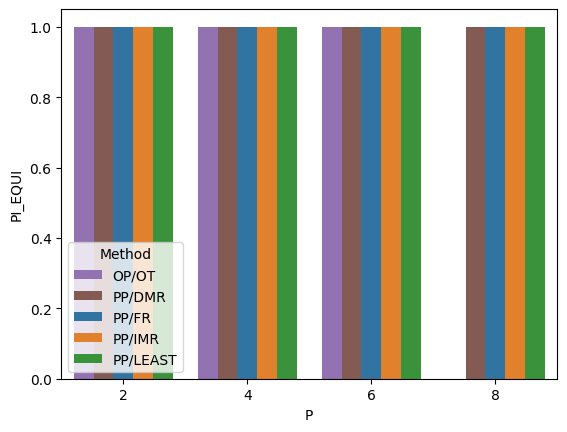

one-step-td


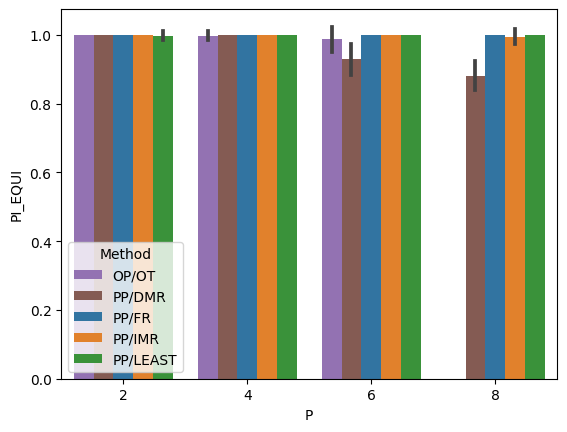

In [19]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

## ABC, n=10, $\gamma=1.0$

first-visit-mc


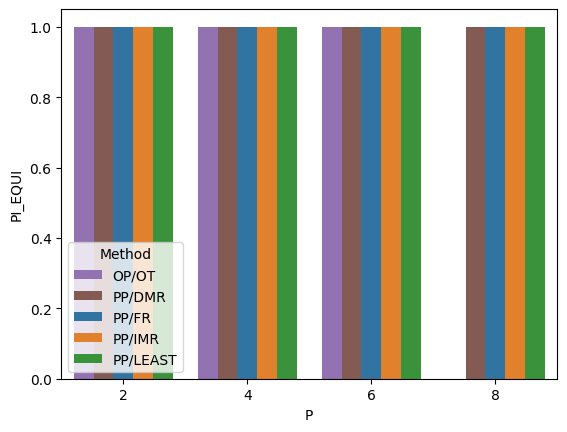

one-step-td


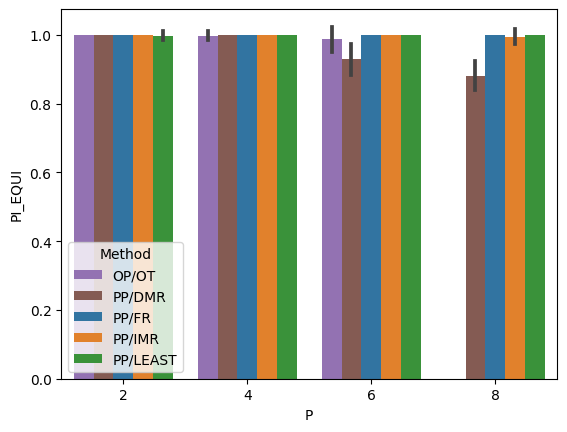

In [20]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


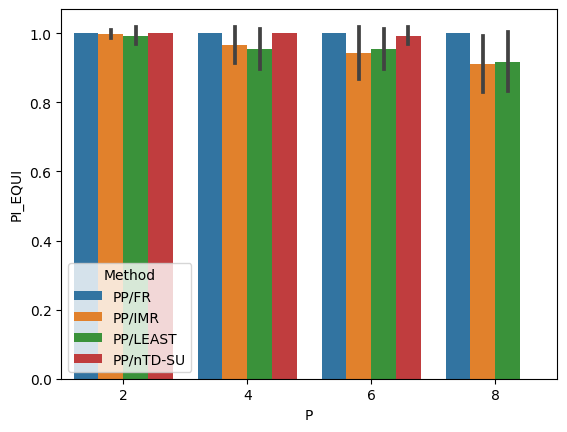

In [21]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=10, $\gamma=0.99$

first-visit-mc


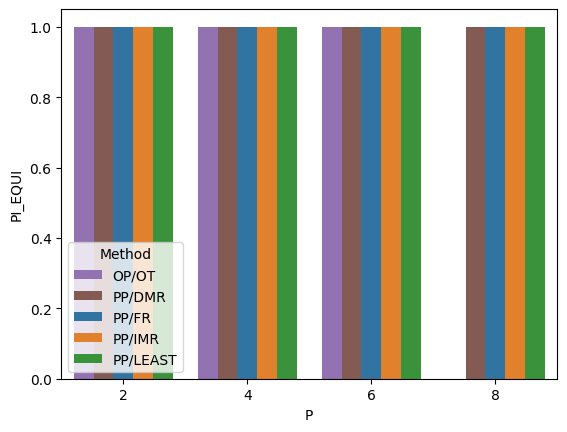

one-step-td


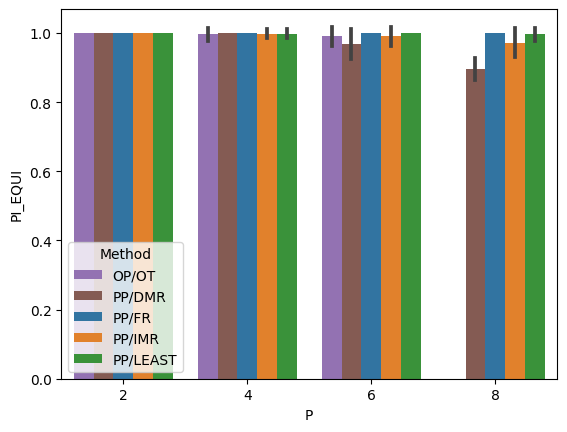

In [22]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


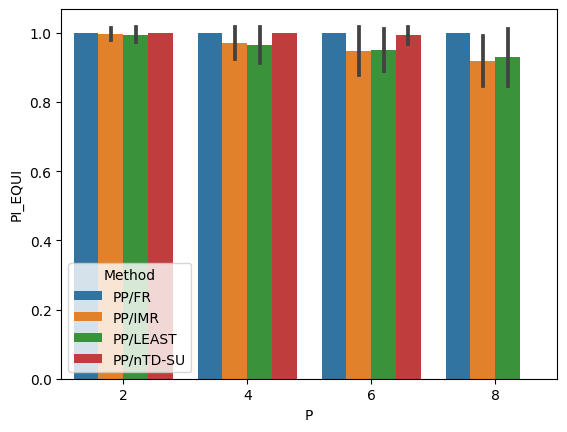

In [23]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=1.0$

first-visit-mc


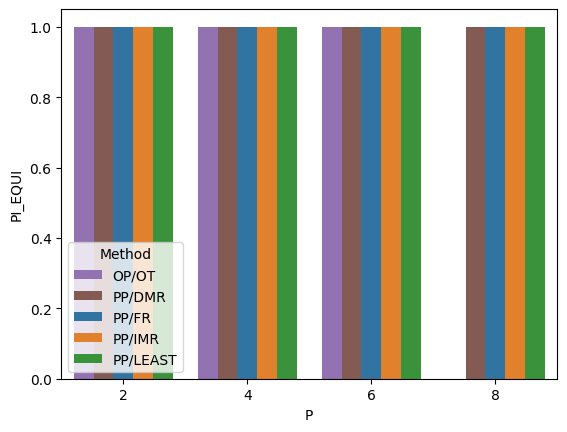

one-step-td


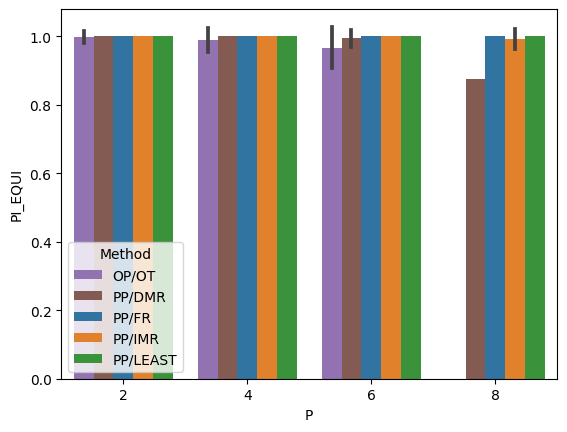

In [24]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


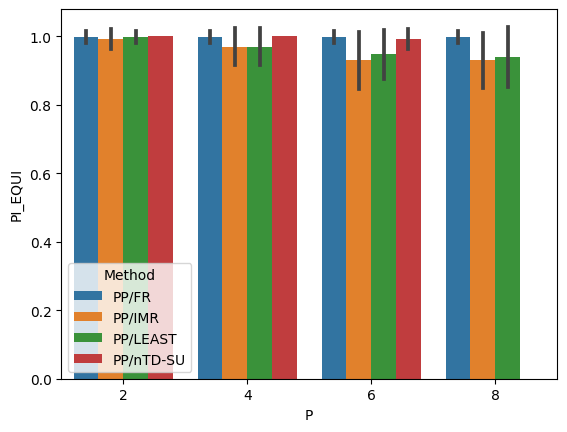

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=0.99$

first-visit-mc


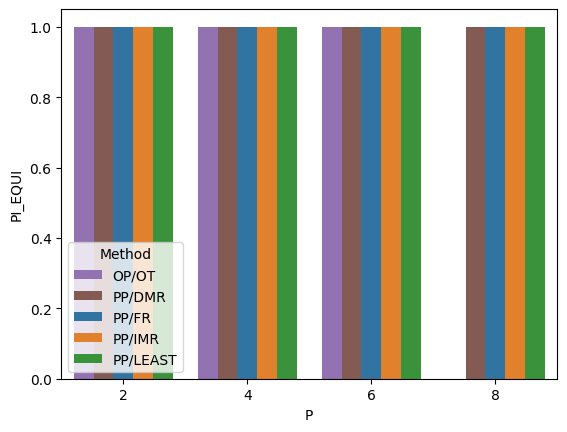

one-step-td


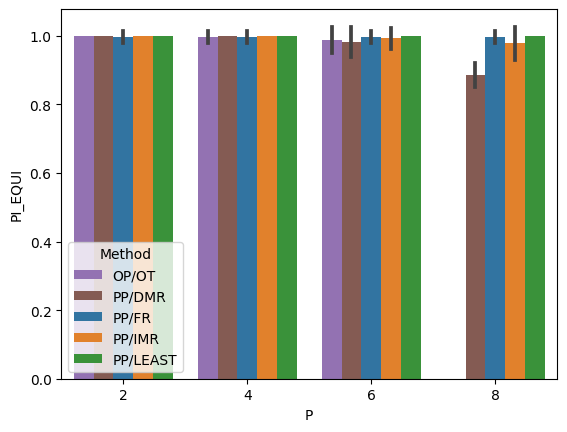

In [26]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


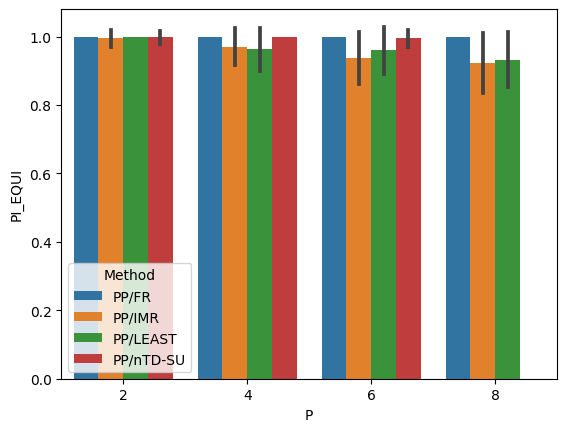

In [27]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=1.0$

first-visit-mc


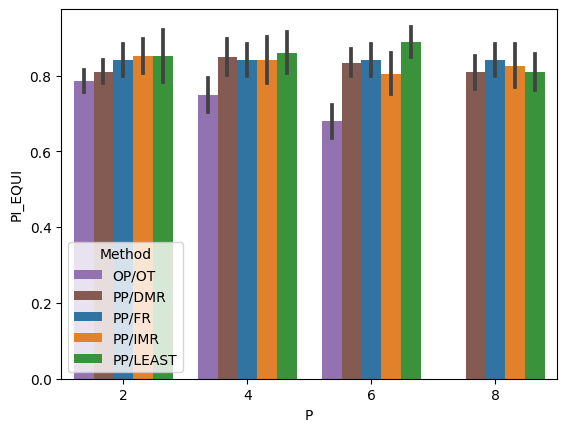

one-step-td


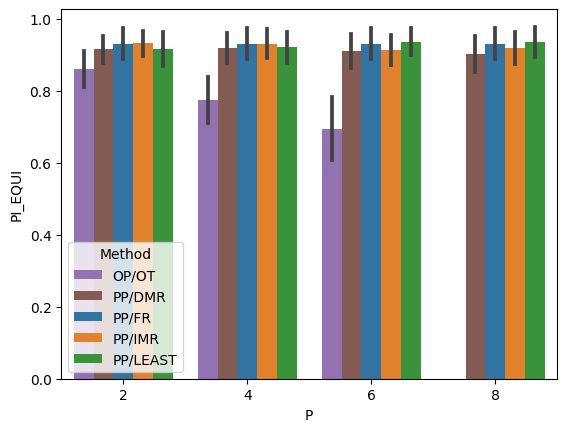

In [28]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


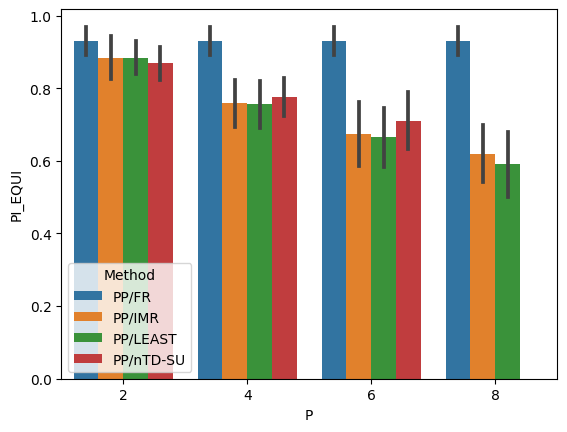

In [29]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=0.99$

first-visit-mc


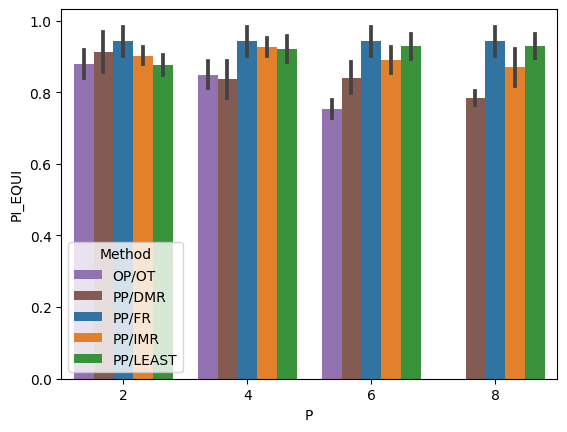

one-step-td


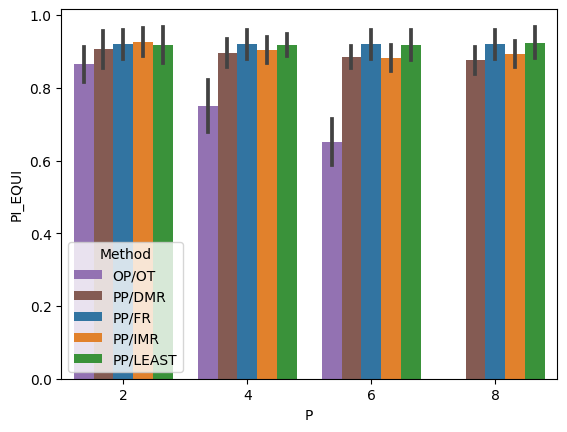

In [30]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


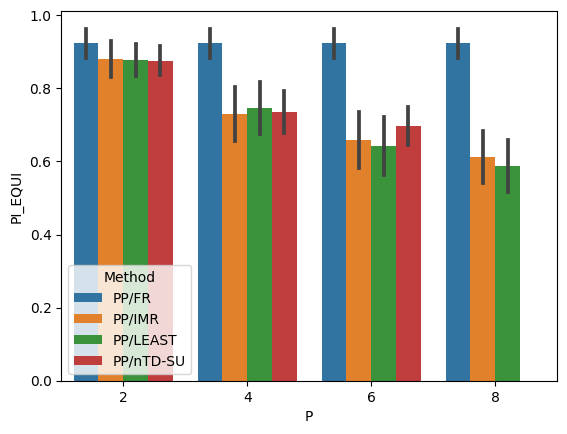

In [31]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=1.0$

first-visit-mc


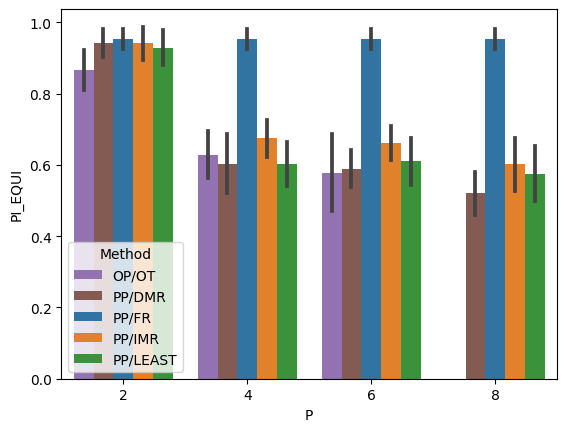

one-step-td


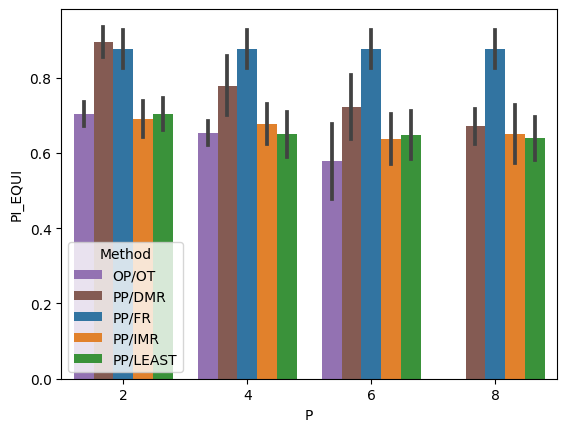

In [32]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


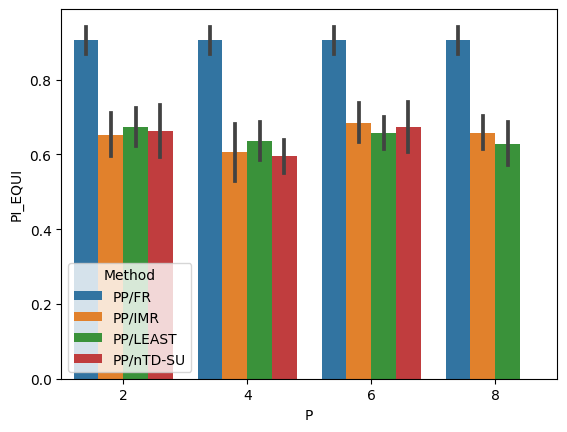

In [33]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=0.99$

first-visit-mc


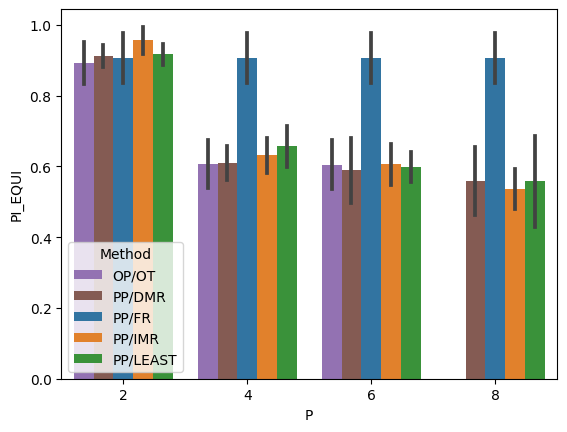

one-step-td


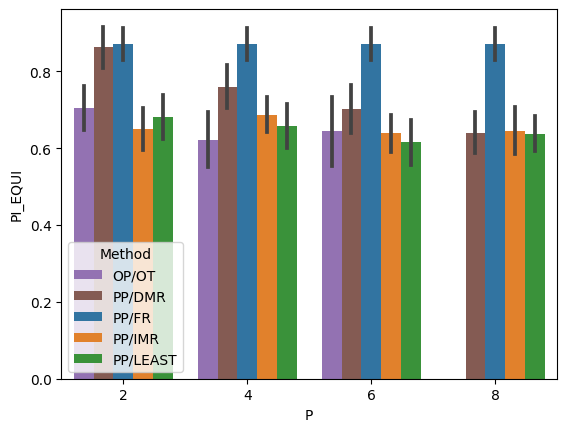

In [34]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


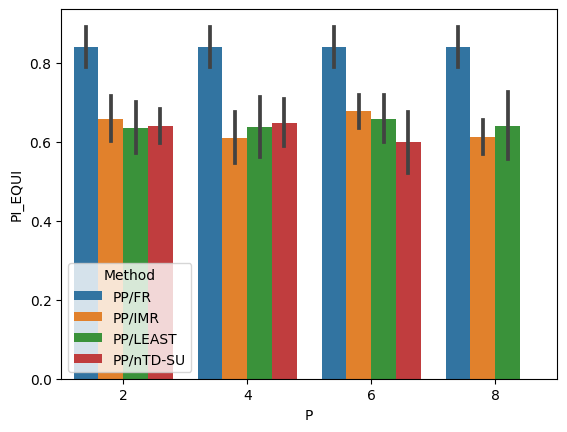

In [35]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=1.0$

first-visit-mc


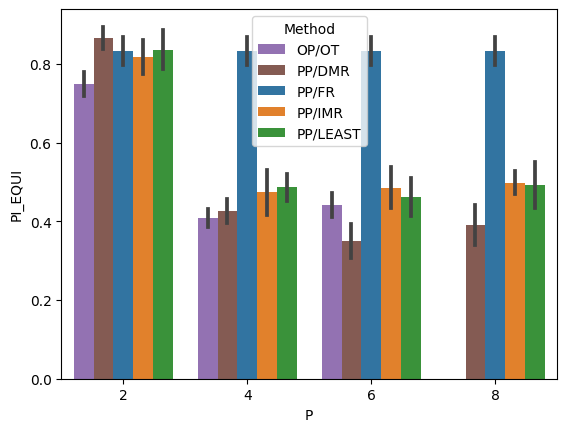

one-step-td


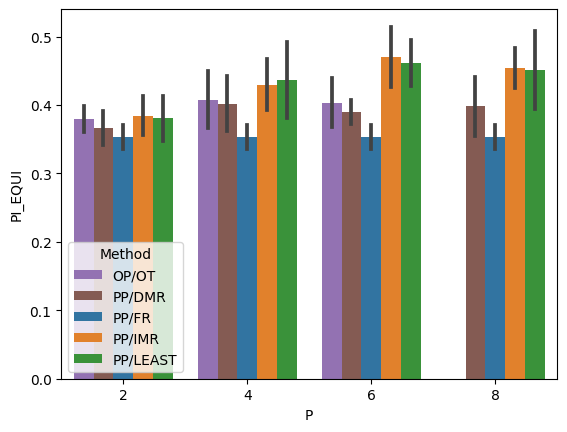

In [36]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


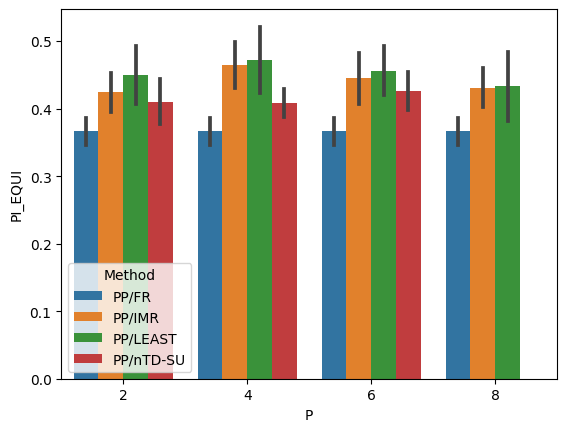

In [37]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=0.99$

first-visit-mc


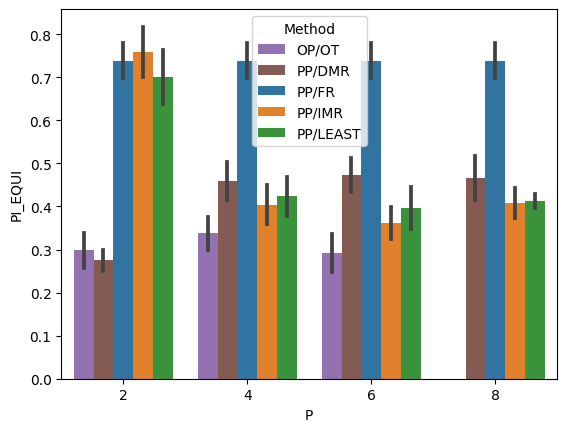

one-step-td


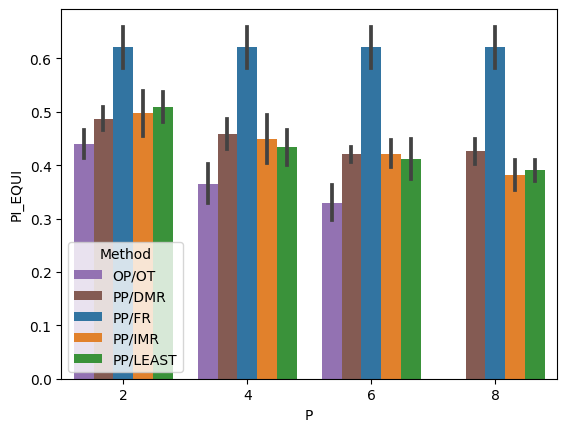

In [38]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


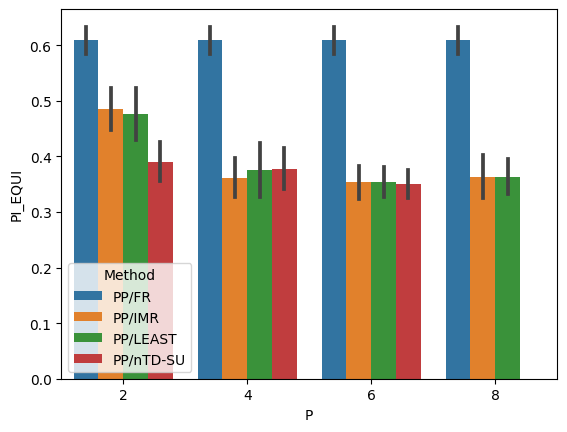

In [39]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=1.0$

first-visit-mc


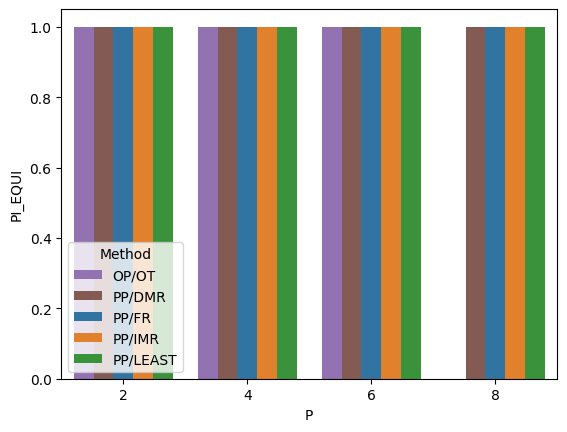

one-step-td


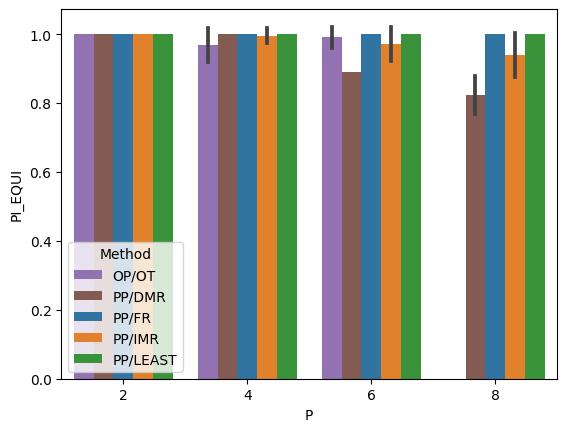

In [40]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


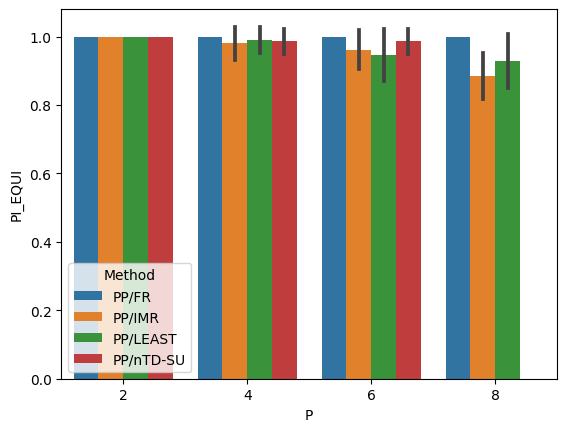

In [41]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=0.99$

first-visit-mc


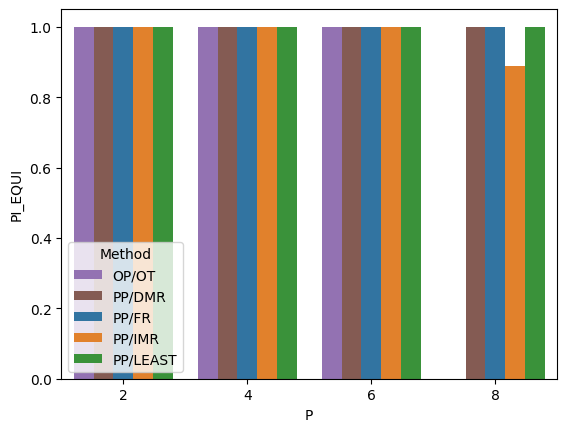

one-step-td


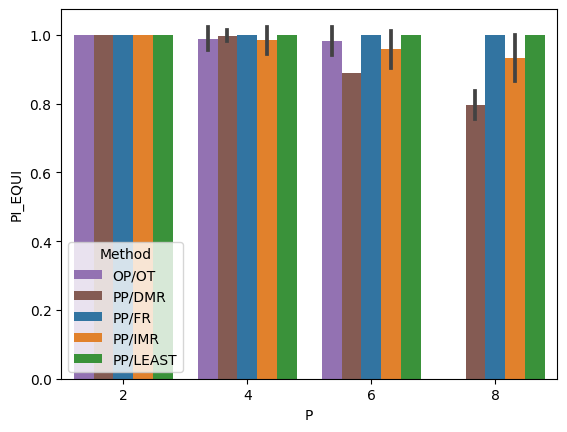

In [42]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


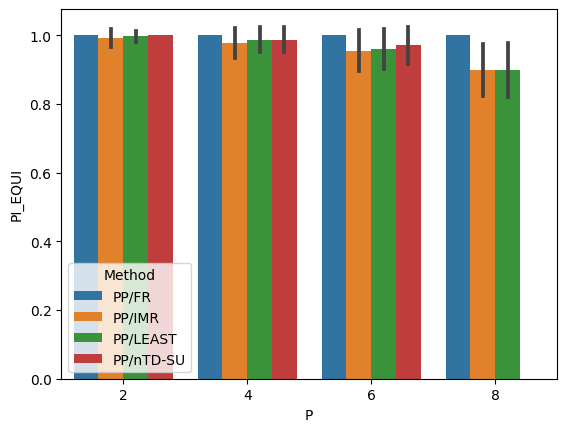

In [43]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=1.0$

first-visit-mc


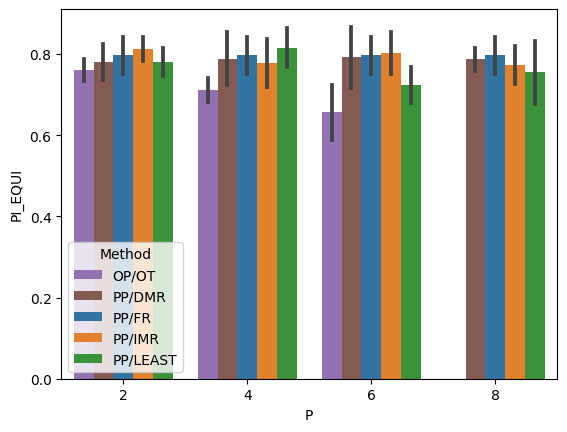

one-step-td


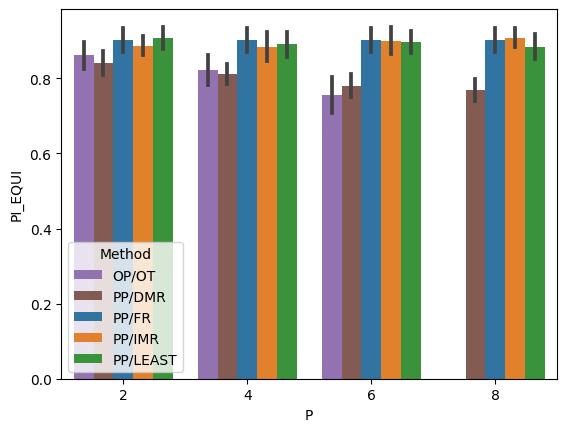

In [44]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


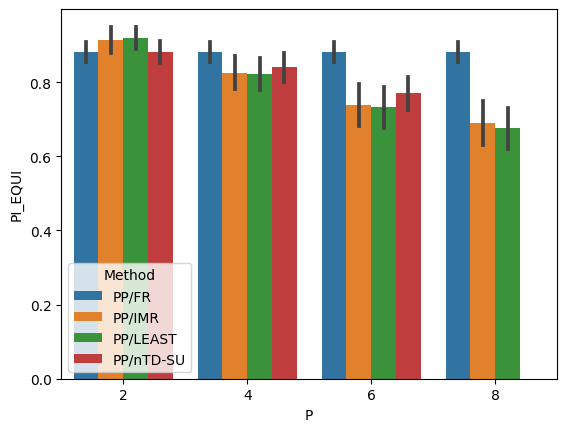

In [45]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=0.99$

first-visit-mc


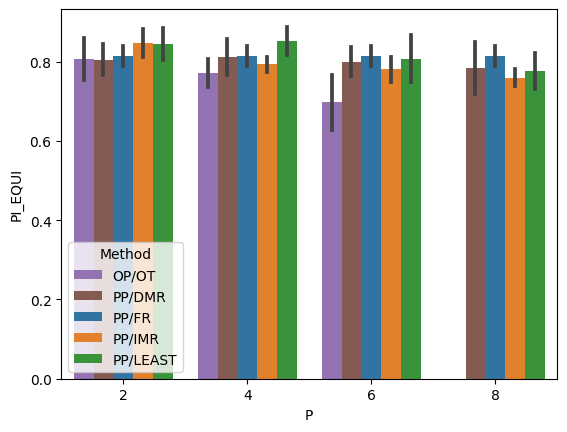

one-step-td


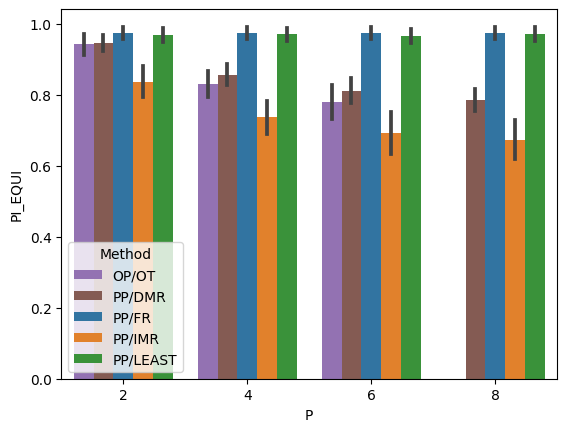

In [46]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

## FrozenLake-v1, 4x4, $\gamma=1.0$

first-visit-mc


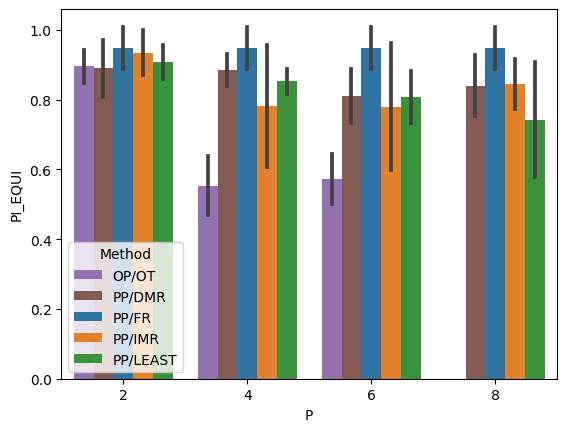

one-step-td


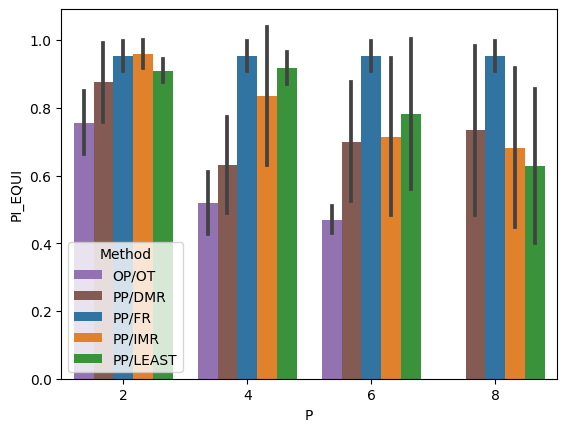

In [47]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


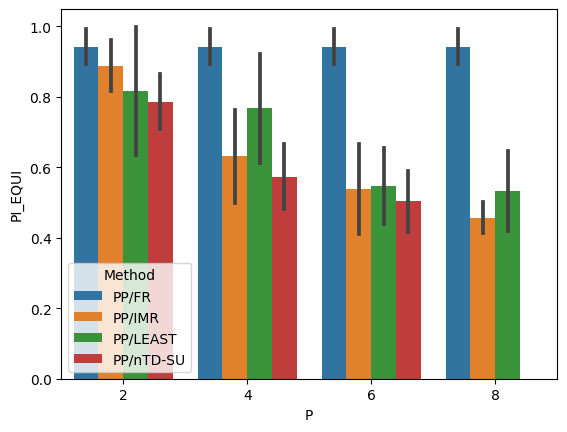

In [48]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=0.99$

first-visit-mc


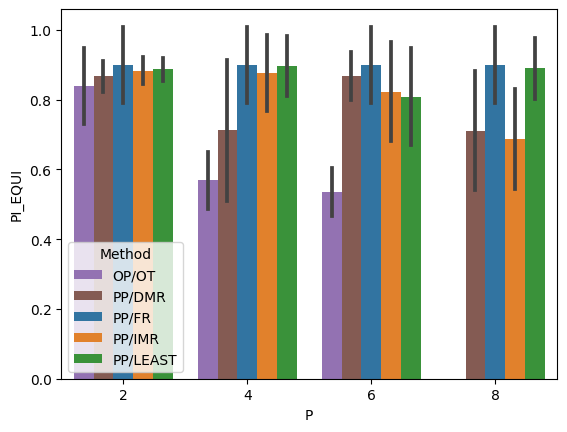

one-step-td


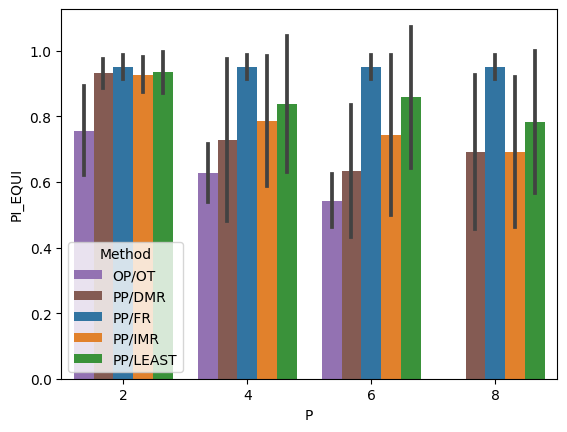

In [49]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


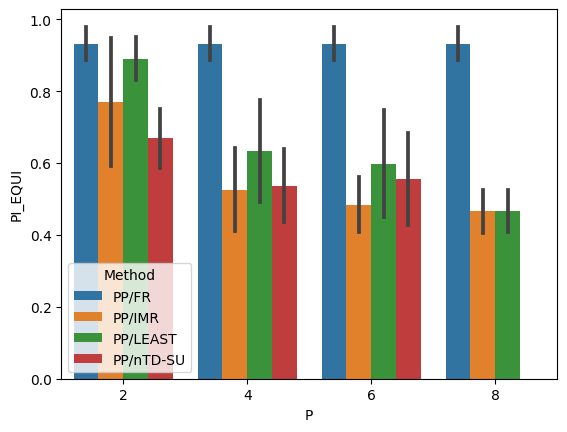

In [50]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## Results Table

In [51]:
def results_tables(
    df_data: pd. DataFrame,
    klast_snapshots: int,
    metric_family: str,
    metric_col: str
):
    # per algorithm (category)
    dfs = {}
    for key, df_result in df_data.items():
        df_ref = df_result.drop(columns=[
            "state_values", "over_states_then_runs", "policy_metrics"
        ])
        
        unique_episodes = df_result["episode"].unique()
        snapshots = set(sorted(unique_episodes)[-klast_snapshots:])
        df_ref = copy.deepcopy(
            df_result[df_result["episode"].apply(lambda episode: episode in snapshots)]
        )
        df_ref[metric_col] = df_ref[metric_family].apply(lambda mp: mp[metric_col])
        df_ref = df_ref.drop(columns=[
            "state_values", "over_states_then_runs", "over_runs_then_states", "policy_metrics"
        ])
        df_ref = df_ref.explode(metric_col)
        # ignore constant `drop_truncated_feedback_episodes`
        calc_cols = ["algorithm", "algorithm_args", "method", "name", "level", "reward_period", "pi_equi"]
        df_ref = df_ref[calc_cols]
    
        def rename_env(env: str):
            try:
                return plotting.SHORT_NAMES[env]
            except KeyError:
                return env
        df_ref["name"] = df_ref["name"].apply(rename_env)    
        # split to give flexibility in plotting
        algorithms = sorted(df_ref["algorithm"].unique())
        for algorithm in algorithms:
            df_plot = df_ref[df_ref["algorithm"] == algorithm]
            index = ["algorithm", "algorithm_args", "name", "level", "reward_period"]
            values = ["pi_equi"]
            columns = ["method"]
            df_algo = df_plot.pivot_table(
                values=values, columns=columns, index=index, aggfunc="mean"
            )
            df_algo = df_algo.reindex(sorted(df_algo.columns), axis=1)
            dfs[algorithm] = df_algo

    return dfs

In [52]:
dfs_piequi = results_tables(
    df_eval_result, 
    klast_snapshots=10, 
    metric_family="policy_metrics",
    metric_col="pi_equi"
)

In [53]:
dfs_piequi.keys()

dict_keys(['first-visit-mc', 'one-step-td', 'nstep-td'])

In [54]:
dfs_piequi["first-visit-mc"]

pi_equi  \
method                                                                OP/OT   
algorithm      algorithm_args name          level   reward_period             
first-visit-mc {}             ABCSeq        n=10    2                   1.0   
                                                    4                   1.0   
                                                    6                   1.0   
                                                    8                   NaN   
                                            n=7     2                   1.0   
                                                    4                   1.0   
                                                    6                   1.0   
                                                    8                   NaN   
                              FrozenLake-v1 4x4     2                0.8675   
                                                    4               0.56125   
                                                    6              0.553125   
                                                    8                   NaN   
                              GridWorld     4x12    2              0.832368   
                                                    4              0.798947   
                                                    6              0.716579   
                                                    8                   NaN   
                              IceWorld      4x4     2               0.87875   
                                                    4              0.618125   
                                                    6               0.59125   
                                                    8                   NaN   
                                            8x8     2              0.523438   
                                                    4              0.373281   
                                                    6              0.367188   
                                                    8                   NaN   
                              RGS           n=9     2                   1.0   
                                                    4                   1.0   
                                                    6                   1.0   
                                                    8                   NaN   
                              ToH           disks=4 2              0.783333   
                                                    4              0.741728   
                                                    6              0.676667   
                                                    8                   NaN   

                                                                             \
method                                                               PP/DMR   
algorithm      algorithm_args name          level   reward_period             
first-visit-mc {}             ABCSeq        n=10    2                   1.0   
                                                    4                   1.0   
                                                    6                   1.0   
                                                    8                   1.0   
                                            n=7     2                   1.0   
                                                    4                   1.0   
                                                    6                   1.0   
                                                    8                   1.0   
                              FrozenLake-v1 4x4     2              0.878125   
                                                    4              0.798125   
                                                    6               0.83875   
                                                    8              0.775625   
                              GridWorld     4x12    2              0.861053   
                                      

In [55]:
dfs_piequi["one-step-td"]

pi_equi  \
method                                                             OP/OT   
algorithm   algorithm_args name          level   reward_period             
one-step-td {}             ABCSeq        n=10    2                   1.0   
                                                 4              0.997273   
                                                 6              0.989091   
                                                 8                   NaN   
                                         n=7     2               0.99875   
                                                 4               0.99375   
                                                 6                0.9775   
                                                 8                   NaN   
                           FrozenLake-v1 4x4     2               0.75625   
                                                 4                0.5725   
                                                 6               0.50625   
                                                 8                   NaN   
                           GridWorld     4x12    2              0.861842   
                                                 4              0.762105   
                                                 6              0.672105   
                                                 8                   NaN   
                           IceWorld      4x4     2              0.704375   
                                                 4                0.6375   
                                                 6              0.610625   
                                                 8                   NaN   
                                         8x8     2              0.409844   
                                                 4              0.386562   
                                                 6              0.366719   
                                                 8                   NaN   
                           RGS           n=9     2                   1.0   
                                                 4              0.978889   
                                                 6              0.986667   
                                                 8                   NaN   
                           ToH           disks=4 2              0.901728   
                                                 4              0.826173   
                                                 6              0.768148   
                                                 8                   NaN   

                                                                          \
method                                                            PP/DMR   
algorithm   algorithm_args name          level   reward_period             
one-step-td {}             ABCSeq        n=10    2                   1.0   
                                                 4                   1.0   
                                                 6              0.949091   
                                                 8              0.889091   
                                         n=7     2                   1.0   
                                                 4                   1.0   
                                                 6               0.98875   
                                                 8                  0.88   
                           FrozenLake-v1 4x4     2              0.903125   
                                                 4              0.679375   
                                                 6               0.66625   
                                                 8                0.7125   
                           GridWorld     4x12    2              0.910263   
                                                 4              0.907105   
                                                 6              0.897105   
                                    

In [56]:
dfs_piequi["nstep-td"]

pi_equi  \
method                                                           PP/FR   
algorithm algorithm_args name          level   reward_period             
nstep-td  {}             ABCSeq        n=10    2                   1.0   
                                               4                   1.0   
                                               6                   1.0   
                                               8                   1.0   
                                       n=7     2               0.99875   
                                               4               0.99875   
                                               6               0.99875   
                                               8               0.99875   
                         FrozenLake-v1 4x4     2                0.9375   
                                               4                0.9375   
                                               6                0.9375   
                                               8                0.9375   
                         GridWorld     4x12    2              0.926842   
                                               4              0.926842   
                                               6              0.926842   
                                               8              0.926842   
                         IceWorld      4x4     2              0.873125   
                                               4              0.873125   
                                               6              0.873125   
                                               8              0.873125   
                                       8x8     2              0.487812   
                                               4              0.487812   
                                               6              0.487812   
                                               8              0.487812   
                         RGS           n=9     2                   1.0   
                                               4                   1.0   
                                               6                   1.0   
                                               8                   1.0   
                         ToH           disks=4 2              0.925926   
                                               4              0.925926   
                                               6              0.925926   
                                               8              0.925926   

                                                                        \
method                                                          PP/IMR   
algorithm algorithm_args name          level   reward_period             
nstep-td  {}             ABCSeq        n=10    2              0.997273   
                                               4              0.968182   
                                               6              0.945455   
                                               8              0.914545   
                                       n=7     2               0.99375   
                                               4                  0.97   
                                               6               0.93375   
                                               8               0.92625   
                         FrozenLake-v1 4x4     2                  0.83   
                                               4               0.57875   
                                               6               0.51125   
                                               8              0.461875   
                         GridWorld     4x12    2              0.882368   
                                               4              0.744211   
                                               6              0.666579   
                                               8              0.616053   
                         IceWorld      4x4     2              0.65